<a href="https://colab.research.google.com/github/tinnimithun/tinnimithun/blob/main/DIP_Lab_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Dimension:  225 225 3


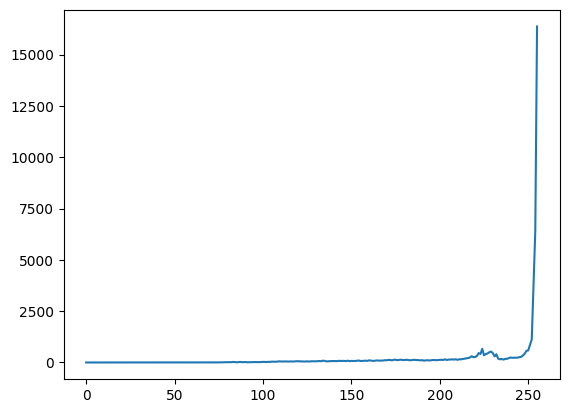

Min intensity:  5
Max intensity:  255
251


In [ ]:
#1
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 =  cv2.imread('DIP_Lab_task_01.png')

rows, cols, channels = img1.shape
print("Image Dimension: ", rows, cols, channels)

# frequency distribution
hist = cv2.calcHist([img1], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

#range
print("Min intensity: ", img1.min())
print("Max intensity: ", img1.max())
print(img1.max() - img1.min() + 1)

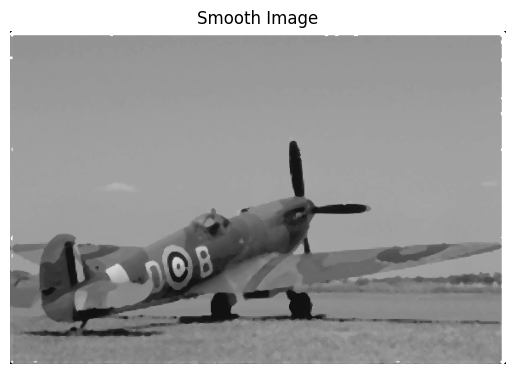

In [ ]:

#3
#gray_img = r
#image smoothing
def conv(image, kernel):
  kernelh, kernelw = kernel.shape
  padh = kernelh//2
  padw = kernelw//2

  padded_image = np.pad(image, ((padh, padh), (padw, padw)), 'constant')

  rows, cols = image.shape
  output = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
        roi = padded_image[i:i+kernelh, j:j+kernelw]
        output[i, j] = np.median(roi)

  return output

img3 = cv2.imread('/content/DIP_Lab_task_03.png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
smoothing_kernel = np.ones((5, 5), dtype=np.uint8)/9


smooth_img = conv(img3_gray, smoothing_kernel)


plt.imshow(smooth_img, cmap = 'gray')
plt.axis('off')
plt.title('Smooth Image')
plt.show()




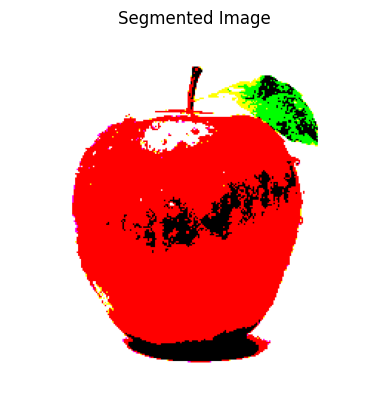

In [ ]:
#5
import cv2
import matplotlib.pyplot as plt

# Load the image
img5 = cv2.imread('/content/DIP_Lab_task_05.jpg')

# Check if the image is loaded correctly
if img5 is None:
    print("Error: Image not loaded. Please ensure the file path is correct.")
else:
    # Define the threshold value
    threshold = 127

    # Get the dimensions of the image
    rows, cols, channels = img5.shape

    # Apply the segmentation logic
    for i in range(rows):
        for j in range(cols):
            for k in range(channels):
                if img5[i, j, k] > threshold:
                    img5[i, j, k] = 255
                else:
                    img5[i, j, k] = 0

    # Convert BGR to RGB for correct display
    img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

    # Display the segmented image
    plt.imshow(img5_rgb)
    plt.axis('off')
    plt.title('Segmented Image')
    plt.show()


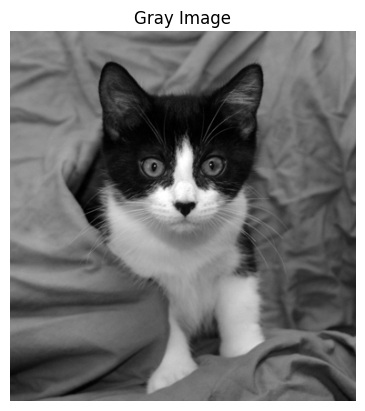

In [ ]:
#2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to convert an RGB image to grayscale
def rgb2gray(image):
    rows, cols, channels = image.shape

    # Initialize the output grayscale image
    output = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            # Get the BGR values (OpenCV loads images in BGR format by default)
            b, g, r = image[i, j]  # Note: OpenCV uses BGR order
            # Compute the grayscale value
            output[i, j] = int(r * 0.29 + g * 0.58 + b * 0.11)

    return output

# Read the input image
img2 = cv2.imread('/content/DIP_Lab_task_02.jpg')

# Check if the image is loaded correctly
if img2 is None:
    print("Error: Image not loaded. Please ensure the file path is correct.")
else:
    # Convert the image to grayscale
    gray_img = rgb2gray(img2)

    # Display the grayscale image
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.title('Gray Image')
    plt.show()




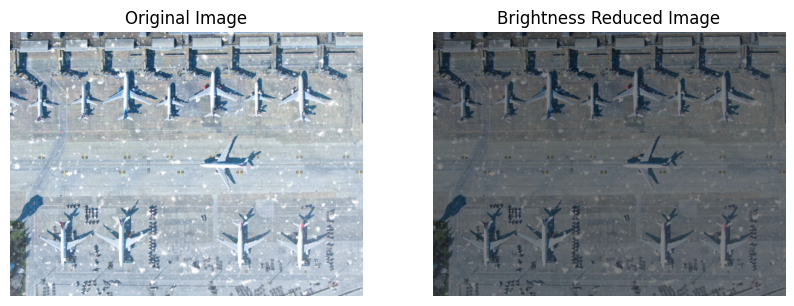

In [ ]:
#4
img4_path = '/content/DIP_Lab_task_04.jpg'
img4 = cv2.imread(img4_path, cv2.IMREAD_COLOR)

# Check if the image is loaded correctly
if img4 is None:
    print("Error: Image not loaded. Please ensure the file path is correct.")
else:
    # Reduce brightness
    brightness_factor = 0.5
    reduced_brightness_img4 = (img4.astype(np.float32) * brightness_factor).clip(0, 255).astype(np.uint8)

    # Display the original and brightness-reduced images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Brightness-reduced image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(reduced_brightness_img4, cv2.COLOR_BGR2RGB))
    plt.title('Brightness Reduced Image')
    plt.axis('off')

    plt.show()
